Steps for Algorithm

1. Business Understanding

2. Data Mining

3. Data Cleaning

4. Data Exploration

5. Feature Engineering

6. Predictive Modelling

7. Data Visualization


In [1]:
# Logistic Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
# Importing the dataset
dataset = pd.read_csv('Purchase.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [4]:
dataset.shape

(400, 5)

In [6]:
# Data Cleaning

In [7]:
dataset.isnull().values.any()

False

In [5]:
#dataset['EstimatedSalary'].fillna(dataset['EstimatedSalary'].mean())

In [8]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
dataset.info()    # full information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
dataset.count()   # displays non null values

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

In [11]:
# Data Exploration/ Exploratory data anlaysis

In [12]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
dataset['Purchased'].unique()

array([0, 1])

In [7]:
dataset['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [15]:
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [16]:
dataset.groupby(['Gender','Purchased']).size()

Gender  Purchased
Female  0            127
        1             77
Male    0            130
        1             66
dtype: int64

In [17]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


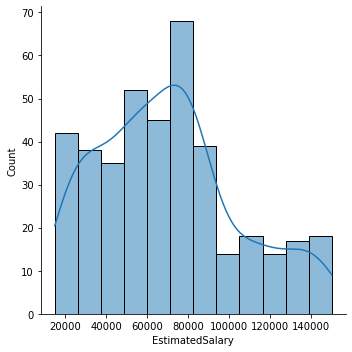

In [18]:
sns.displot(dataset['EstimatedSalary'],kde=True);

In [19]:
dataset['EstimatedSalary'].skew()  
# range from -0.5 to +0.5 fairly symentrical

0.49502362888993623

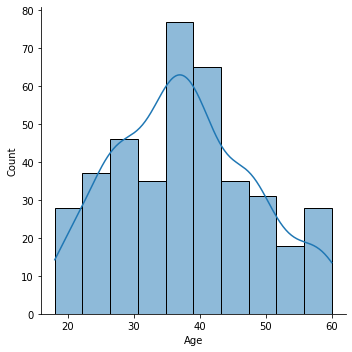

In [20]:
sns.displot(dataset['Age'],kde=True);

In [21]:
dataset['Age'].skew()   # -0.5 to +0.5 fairly symetrical

0.23133746309642822

In [22]:
dataset['Age'].mean()

37.655

In [23]:
dataset['Age'].median()

37.0

In [24]:
len(dataset[(dataset['Age']>20)&(dataset['Age']<35)])

127

In [25]:
dataset[(dataset['Age']>20)&(dataset['Age']<35)]['EstimatedSalary'].mean()

65086.61417322834

In [26]:
dataset[(dataset['Age']>20)&(dataset['Age']<35)]['Purchased'].value_counts()

0    113
1     14
Name: Purchased, dtype: int64

In [27]:
dataset[dataset['Purchased']==0]['EstimatedSalary'].mean()

60544.74708171206

In [27]:
dataset[dataset['Purchased']==1]['EstimatedSalary'].mean()

86272.72727272728

In [29]:
len(dataset[dataset['Age']>35])

222

In [30]:
dataset.corr()
# Relationship between two variables

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


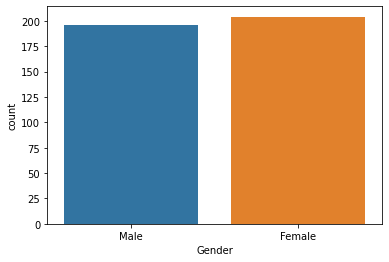

In [29]:
sns.countplot(x='Gender',data=dataset);

In [16]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:
# Feature Engineering 

In [4]:
X = dataset.iloc[:, [2, 3]].values   #  independent variables
y = dataset.iloc[:, 4].values   # dependent variable

In [32]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [33]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)



In [11]:
X_train.shape

(360, 2)

In [12]:
X_test.shape

(40, 2)

In [13]:
y_train.shape

(360,)

In [14]:
y_test.shape

(40,)

#### Predictive Modelling

In [34]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)  # training the data

LogisticRegression()

In [35]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [36]:
y_pred  # predictedoutput values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
y_test   # actual test output values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [26]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
y_pred_prob=classifier.predict_proba(X_test)
# to check the probability output

In [28]:
y_pred_prob

array([[0.532255  , 0.467745  ],
       [0.54282611, 0.45717389],
       [0.53830564, 0.46169436],
       [0.53265863, 0.46734137],
       [0.53956462, 0.46043538],
       [0.53236541, 0.46763459],
       [0.53697483, 0.46302517],
       [0.53591747, 0.46408253],
       [0.52011648, 0.47988352],
       [0.5529382 , 0.4470618 ],
       [0.53417184, 0.46582816],
       [0.53168946, 0.46831054],
       [0.54148777, 0.45851223],
       [0.5425547 , 0.4574453 ],
       [0.52139148, 0.47860852],
       [0.53292135, 0.46707865],
       [0.54038057, 0.45961943],
       [0.52034937, 0.47965063],
       [0.55723417, 0.44276583],
       [0.54097409, 0.45902591],
       [0.53971567, 0.46028433],
       [0.54787292, 0.45212708],
       [0.5460337 , 0.4539663 ],
       [0.54983005, 0.45016995],
       [0.52759892, 0.47240108],
       [0.5501916 , 0.4498084 ],
       [0.53007431, 0.46992569],
       [0.53151808, 0.46848192],
       [0.54113552, 0.45886448],
       [0.53448488, 0.46551512],
       [0.

In [29]:
y_pred   #  predicted  test values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
y_test  # Actual output values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[32,  0],
       [ 8,  0]])

In [32]:
accuracy_score(y_test, y_pred)

0.8

In [33]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [34]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
# Z score= deviation/standard deviation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  
#   converting to standard scalar values
X_test = sc.transform(X_test)

In [ ]:
# to display as float values
#np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [20]:
X_train

array([[-1.05714987,  0.53420426],
       [ 0.2798728 , -0.51764734],
       [-1.05714987,  0.41733186],
       [-0.29313691, -1.45262654],
       [ 0.47087604,  1.23543867],
       [-1.05714987, -0.34233874],
       [-0.10213368,  0.30045946],
       [ 1.33039061,  0.59264046],
       [-1.15265148, -1.16044554],
       [ 1.04388575,  0.47576806],
       [ 1.8078987 ,  1.52761967],
       [-0.38863853, -1.30653604],
       [-0.29313691, -0.37155684],
       [-0.38863853,  1.32309297],
       [ 1.99890194,  0.53420426],
       [ 0.66187928, -1.10200934],
       [-0.86614663,  0.38811376],
       [-1.15265148,  0.30045946],
       [ 1.04388575, -1.21888174],
       [-1.43915634, -1.45262654],
       [-0.57964177, -1.51106275],
       [ 2.09440356, -0.80982834],
       [-1.82116282,  0.18358706],
       [-0.19763529,  0.85560337],
       [-1.82116282, -1.27731794],
       [ 2.09440356,  0.38811376],
       [-1.34365472,  0.56342236],
       [-1.05714987, -0.34233874],
       [ 0.18437118,

In [21]:
X_test

array([[-0.77064501,  0.50498616],
       [-0.00663206, -0.57608354],
       [-0.29313691,  0.15436896],
       [-0.77064501,  0.27124136],
       [-0.29313691, -0.57608354],
       [-1.05714987, -1.45262654],
       [-0.67514339, -1.59871705],
       [-0.19763529,  2.17041787],
       [-1.91666444, -0.05015774],
       [ 0.85288251, -0.78061024],
       [-0.77064501, -0.60530164],
       [-0.96164825, -0.42999304],
       [-0.10213368, -0.42999304],
       [ 0.08886956,  0.21280516],
       [-1.7256612 ,  0.47576806],
       [-0.57964177,  1.38152917],
       [-0.10213368,  0.21280516],
       [-1.82116282,  0.44654996],
       [ 1.61689547,  1.76136447],
       [-0.29313691, -1.39419034],
       [-0.29313691, -0.66373784],
       [ 0.85288251,  2.17041787],
       [ 0.2798728 , -0.54686544],
       [ 0.85288251,  1.03091197],
       [-1.43915634, -1.21888174],
       [ 1.04388575,  2.08276357],
       [-0.96164825,  0.50498616],
       [-0.86614663,  0.30045946],
       [-0.10213368,

In [22]:
#from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression()
classifier1.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred1=classifier1.predict(X_test)

In [24]:
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [40]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [41]:
confusion_matrix(y_test,y_pred1)

array([[31,  1],
       [ 1,  7]])

In [42]:
accuracy_score(y_test,y_pred1)

0.95

In [43]:
y_pred_prob1=classifier1.predict_proba(X_test)

In [44]:
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [45]:
y_pred_prob1

array([[0.88213607, 0.11786393],
       [0.82289204, 0.17710796],
       [0.79666119, 0.20333881],
       [0.90585056, 0.09414944],
       [0.89571355, 0.10428645],
       [0.9912579 , 0.0087421 ],
       [0.98318606, 0.01681394],
       [0.2678345 , 0.7321655 ],
       [0.99373824, 0.00626176],
       [0.47816462, 0.52183538],
       [0.96105567, 0.03894433],
       [0.96854164, 0.03145836],
       [0.82975409, 0.17024591],
       [0.61858431, 0.38141569],
       [0.98357288, 0.01642712],
       [0.65955196, 0.34044804],
       [0.70954038, 0.29045962],
       [0.98698381, 0.01301619],
       [0.01145999, 0.98854001],
       [0.9538933 , 0.0461067 ],
       [0.90418979, 0.09581021],
       [0.03702309, 0.96297691],
       [0.70894277, 0.29105723],
       [0.11567837, 0.88432163],
       [0.99502759, 0.00497241],
       [0.02728097, 0.97271903],
       [0.91852139, 0.08147861],
       [0.91963504, 0.08036496],
       [0.79642636, 0.20357364],
       [0.83679927, 0.16320073],
       [0.

In [46]:
confusion_matrix(y_test,y_pred1)

array([[31,  1],
       [ 1,  7]])

/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


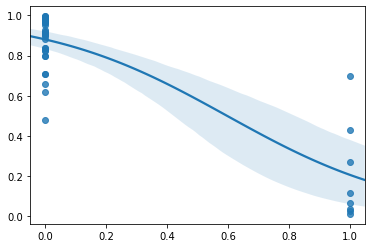

In [47]:
import seaborn as sb
sb.regplot(y_test,y_pred_prob1[:,0], logistic=True)